In [ ]:
import duckdb

# Connect to the database
conn = duckdb.connect("donations.duckdb", read_only=True)

# For complete_donor
complete_donor_schema = conn.execute("DESCRIBE complete_donor").df()
print("Schema for complete_donor:")
display(complete_donor_schema)

# For daily_donor
daily_donor_schema = conn.execute("DESCRIBE daily_donor").df()
print("Schema for daily_donor:")
display(daily_donor_schema)

# For daily_donor_rates
daily_donor_rates_schema = conn.execute("DESCRIBE daily_donor_rates").df()
print("Schema for daily_donor_rates:")
display(daily_donor_rates_schema)

# For daily_retention
daily_retention_schema = conn.execute("DESCRIBE daily_retention").df()
print("Schema for daily_retention:")
display(daily_retention_schema)


In [ ]:
import duckdb

# Connect to the single database
conn = duckdb.connect("donations.duckdb", read_only=True)

# Fetch last 10 rows from complete_donor
df = conn.execute("""
SELECT rowid, *
FROM complete_donor
ORDER BY rowid DESC
LIMIT 10
""").df()

df

# complete_donor
# Results: 
# - There is 9331995 rows in complete_donor and only goes up to 2025-10-29
# - complete_donor has the same column as daily_donor
# - This file is not being updated daily so there is only data up to 2025-10-29 (the day that I was given the link to this parquet)
# - Columns: inst_code, visit_date, previous_visit, donation_type, donation_location, classification_id, blood_group
# Update (28/11/2025):
# - complete_donor now has the latest info from daily_donor as it updates and adds the daily_donor information
#   into its table whenever the code to connect to duckdb is run again

,rowid,inst_code,visit_date,previous_visit,donation_type,donation_location,classification_id,blood_group
0,9361091,11-10040013,2025-11-26,2025-06-20,1,C,C,O
1,9361090,11-02030085,2025-11-26,2025-03-10,1,M,C,O
2,9361089,11-02030085,2025-11-26,2025-04-16,1,M,P,O
3,9361088,11-02030085,2025-11-26,2015-08-12,1,M,C,O
4,9361087,11-02030085,2025-11-26,2025-04-16,1,M,C,A
5,9361086,11-02030085,2025-11-26,2025-04-16,1,M,C,A
6,9361085,11-02030085,2025-11-26,2024-03-11,1,M,C,B
7,9361084,11-02030085,2025-11-26,1800-08-10,1,M,C,AB
8,9361083,11-02030085,2025-11-26,2018-09-19,1,M,A,A
9,9361082,11-02030085,2025-11-26,2025-04-16,1,M,P,AB


In [10]:
# Connect to the single database
conn = duckdb.connect("donations.duckdb", read_only=True)

# Fetch last 10 rows from daily_donor
df = conn.execute("""
SELECT rowid, *
FROM daily_donor
ORDER BY rowid DESC
LIMIT 10
""").df()

df

# daily_donor
# Results:
# - This is a daily file for donor which goes up to the date that is being hardcoded in the parquet link (hardcoded atm: 2025-10-29)
# - Some dates there are no data for this (so for example today's date there might not be a data so cant download the parquet)
# - Maybe needs error handling to retrieve the latest data that is available nearest to the current day of today.
# - Columns: inst_code, visit_date, previous_visit, donation_type, donation_location, classification_id, blood_group

# Update (27/11/2025)
# - Updated the blood_database so that it uploads today's file and if that is not available, it iterates through the previous days until it founds
#   the latest files that can be downloaded

,rowid,inst_code,visit_date,previous_visit,donation_type,donation_location,classification_id,blood_group
0,1445,11-10040013,2025-11-26,2025-06-20,1,C,C,O
1,1444,11-02030085,2025-11-26,2025-03-10,1,M,C,O
2,1443,11-02030085,2025-11-26,2025-04-16,1,M,P,O
3,1442,11-02030085,2025-11-26,2015-08-12,1,M,C,O
4,1441,11-02030085,2025-11-26,2025-04-16,1,M,C,A
5,1440,11-02030085,2025-11-26,2025-04-16,1,M,C,A
6,1439,11-02030085,2025-11-26,2024-03-11,1,M,C,B
7,1438,11-02030085,2025-11-26,1800-08-10,1,M,C,AB
8,1437,11-02030085,2025-11-26,2018-09-19,1,M,A,A
9,1436,11-02030085,2025-11-26,2025-04-16,1,M,P,AB


In [7]:
# Connect to the single database
conn = duckdb.connect("donations.duckdb", read_only=True)

# Fetch last 10 rows from daily_donor_rates
df = conn.execute("""
SELECT rowid, *
FROM daily_donor_rates
ORDER BY rowid DESC
LIMIT 10
""").df()

df

# daily_donor_rates
# Results:
# - This daily donor rates file is being updated daily. Last time that was checked is latest: 2025-11-25 therefore data is up to this date.
# - To retrieve latest data, maybe can delete old file and replace with new file
# - Columns: inst_code, gender, race, birth_date, latest

# Update (27/11/2025)
# - It now will load in the latest file after making some logic changes in blood_database whereby it deletes old file and replace it with new one
#   once it the script runs again

,rowid,inst_code,gender,race,birth_date,latest
0,643802,11-14010001,M,11,1984,2025-11-26
1,643801,11-14010001,M,11,1998,2025-11-26
2,643800,11-14010001,M,11,1987,2025-11-26
3,643799,11-14010001,F,11,1990,2025-11-26
4,643798,11-14010001,M,11,1983,2025-11-26
5,643797,11-14010001,M,11,1986,2025-11-26
6,643796,11-14010001,F,11,1992,2025-11-26
7,643795,11-14010001,M,11,1978,2025-11-26
8,643794,11-14010001,M,3,1980,2025-11-26
9,643793,11-14010001,M,11,1999,2025-11-26


In [6]:
# Connect to the single database
conn = duckdb.connect("donations.duckdb", read_only=True)

# Fetch last 10 rows from daily_retention
df = conn.execute("""
SELECT rowid, *
FROM daily_retention
ORDER BY rowid DESC
LIMIT 10
""").df()

df

# daily_retention
# Results:
# - This daily retention file is being updated daily. Last time that was checked is latest: 2025-11-25 therefore data is up to this date.
# - To retrieve latest data, maybe can delete old file and replace with new file (similar to daily_donor_rates)
# - Columns: donor_id, visit_date, birth_date

# Update (27/11/2025)
# - It now will load in the latest file after making some logic changes in blood_database whereby it deletes old file and replace it with new one
#   once it the script runs again

,rowid,donor_id,visit_date,birth_date
0,6914183,07OuG,2025-11-26,1997
1,6914182,03MvZ,2025-11-26,1983
2,6914181,02fqz,2025-11-26,1977
3,6914180,04VUR,2025-11-26,1997
4,6914179,03Icn,2025-11-26,1990
5,6914178,00lB1,2025-11-26,1979
6,6914177,01z8n,2025-11-26,1997
7,6914176,09kBr,2025-11-26,1968
8,6914175,019Tj,2025-11-26,1981
9,6914174,02RGA,2025-11-26,1992


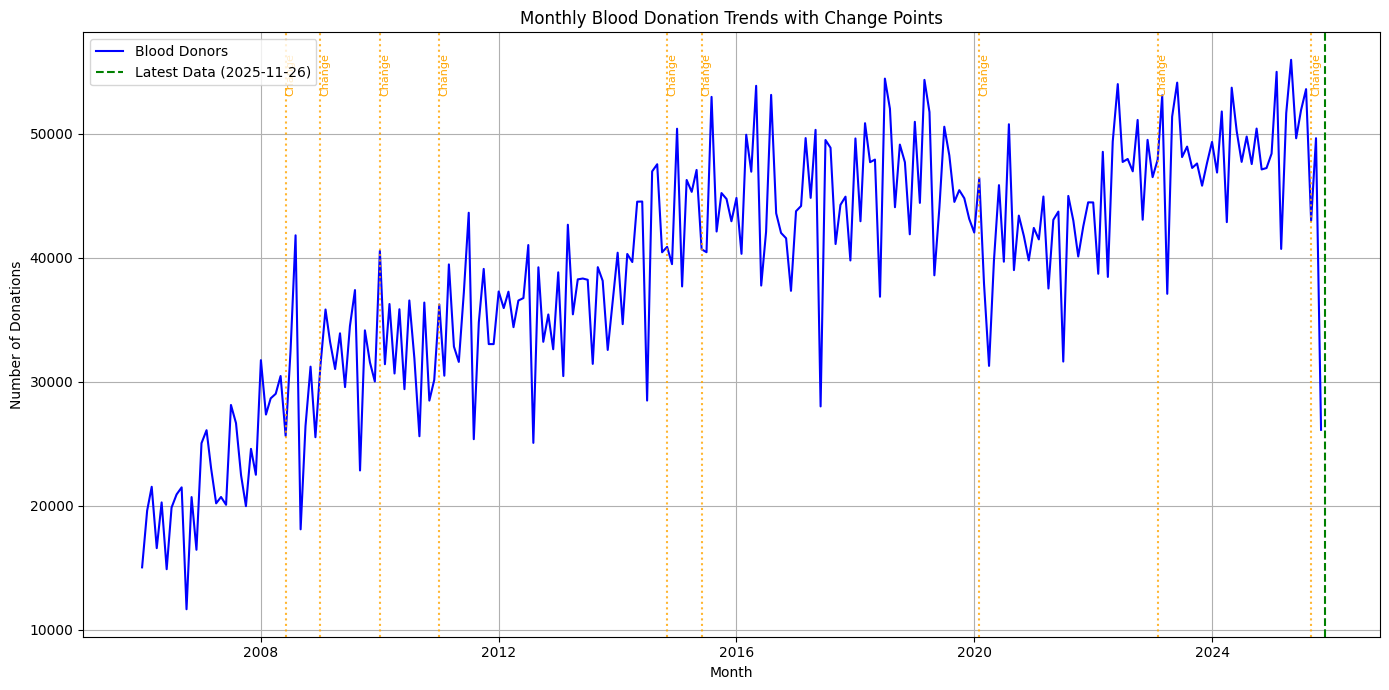

In [2]:

import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DuckDB database
conn = duckdb.connect('donations.duckdb')

# Query data
complete_df = conn.execute("SELECT visit_date FROM complete_donor").fetchdf()
complete_df['visit_date'] = pd.to_datetime(complete_df['visit_date'])

# Aggregate by month
complete_monthly = complete_df.groupby(complete_df['visit_date'].dt.to_period('M')).size().reset_index(name='donations')
complete_monthly['visit_date'] = complete_monthly['visit_date'].dt.to_timestamp()

# Latest date
latest_date = complete_df['visit_date'].max()

# Change point detection
window = 6  # 6-month rolling window
complete_monthly['rolling_mean'] = complete_monthly['donations'].rolling(window=window, center=True).mean()
diffs = complete_monthly['rolling_mean'].diff()
threshold = diffs.std() * 2
change_points = complete_monthly.loc[abs(diffs) > threshold, 'visit_date']

# Plot
plt.figure(figsize=(14, 7))
plt.plot(complete_monthly['visit_date'], complete_monthly['donations'], label='Blood Donors', color='blue')
plt.axvline(x=latest_date, color='green', linestyle='--', label=f'Latest Data ({latest_date.date()})')

# Highlight change points
for cp in change_points:
    plt.axvline(x=cp, color='orange', linestyle=':', alpha=0.8)
    plt.text(cp, complete_monthly['donations'].max()*0.95, 'Change', rotation=90, color='orange', fontsize=8)

plt.title('Monthly Blood Donation Trends with Change Points')
plt.xlabel('Month')
plt.ylabel('Number of Donations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('donation_trends_change_points.png')
plt.show()


- Detects significant shifts in donation patterns using a simple rolling mean difference approach:
    - Calculates a 6-month rolling average.
    - Flags months where the change exceeds 2× the standard deviation of differences.
- Highlights change points on the chart with orange dashed lines.
- Annotates these points for clarity.


✅ Why This Adds Insight

- The public can now see when donation behavior changed significantly (e.g., due to campaigns, seasonal effects, or external events).
- Makes the visualization actionable and interesting rather than just a trend line.

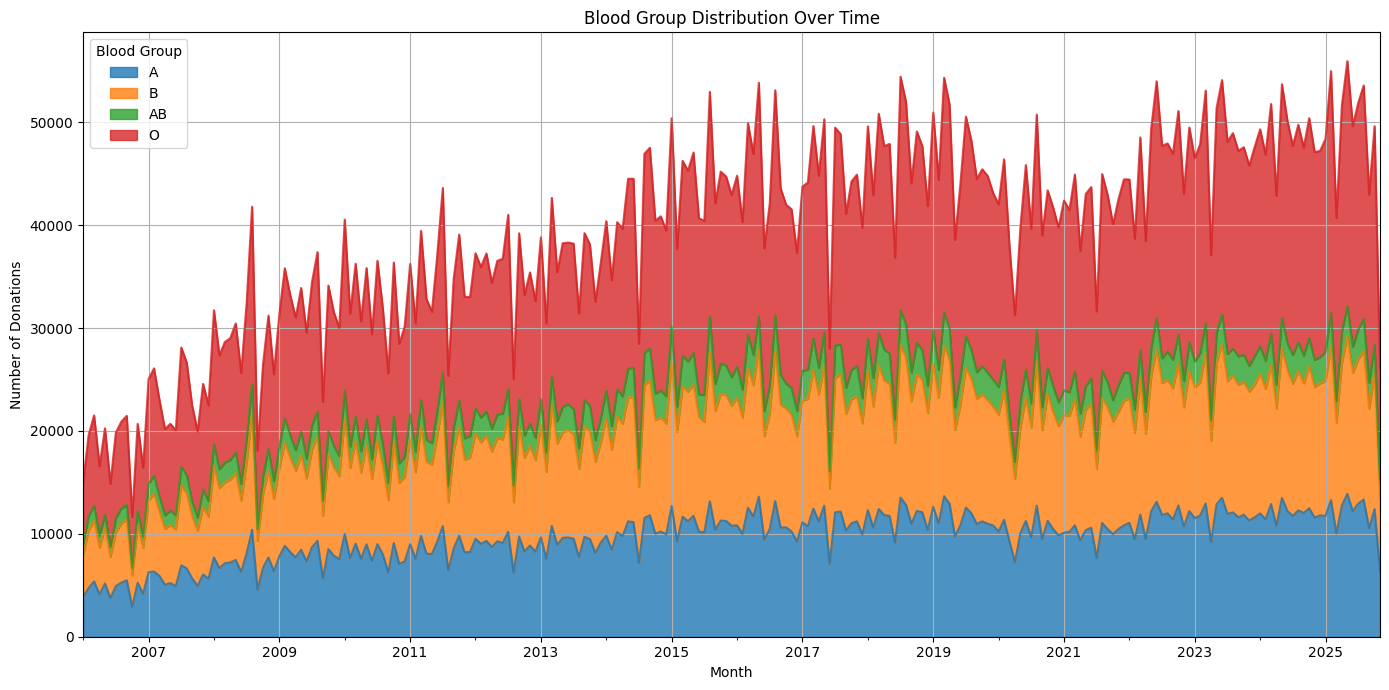

In [14]:

import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DuckDB database
conn = duckdb.connect('donations.duckdb')

# Query blood group data
query = "SELECT visit_date, blood_group FROM complete_donor WHERE blood_group IS NOT NULL"
df = conn.execute(query).fetchdf()

# Convert visit_date to datetime
df['visit_date'] = pd.to_datetime(df['visit_date'])

# Aggregate by month and blood group
df_grouped = df.groupby([df['visit_date'].dt.to_period('M'), 'blood_group']).size().reset_index(name='count')
df_grouped['visit_date'] = df_grouped['visit_date'].dt.to_timestamp()

# Pivot for stacked area chart
pivot_df = df_grouped.pivot(index='visit_date', columns='blood_group', values='count').fillna(0)

# Sort columns for consistent order
if set(['A','B','AB','O']).issubset(pivot_df.columns):
    pivot_df = pivot_df[['A', 'B', 'AB', 'O']]

# Plot stacked area chart
plt.figure(figsize=(14, 7))
pivot_df.plot.area(ax=plt.gca(), alpha=0.8)

plt.title('Blood Group Distribution Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Donations')
plt.legend(title='Blood Group')
plt.grid(True)
plt.tight_layout()
plt.savefig('blood_group_distribution.png')


✅ Why This Is Insightful
- Shows dominant blood groups over time.
- Detects seasonal or demographic shifts.
- Useful for public awareness campaigns (e.g., if O blood group is consistently high demand).

  age_group  total_donors  repeat_donors  retention_rate
0     20-29        590663         247072       41.829605
1     30-39        852760         424817       49.816713
2     40-49        532299         288866       54.267620
3       50+        354515         194560       54.880612
4       <20         19871           3213       16.169292


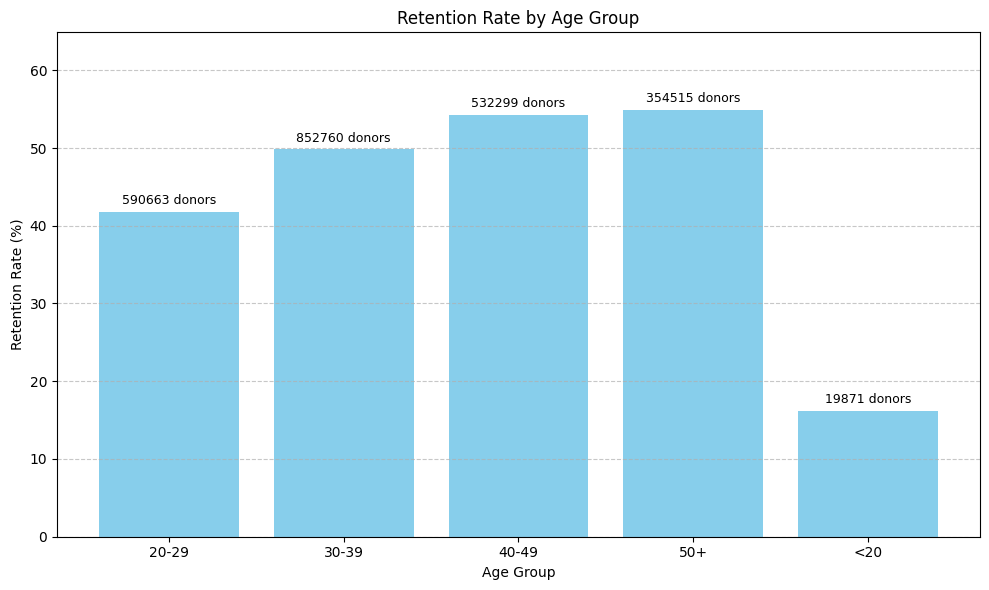

In [24]:

import duckdb
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Connect to DuckDB
conn = duckdb.connect('donations.duckdb')

# Load daily_retention
df = conn.execute("SELECT donor_id, visit_date, birth_date FROM daily_retention").fetchdf()

if df.empty:
    print("⚠️ No data found in daily_retention.")
else:
    # Calculate age
    current_year = datetime.now().year
    df['age'] = current_year - df['birth_date'].astype(int)

    # Count visits per donor
    visit_counts = df.groupby(['donor_id', 'age']).size().reset_index(name='visit_count')

    # Assign age groups
    def age_group(age):
        if age < 20: return '<20'
        elif age < 30: return '20-29'
        elif age < 40: return '30-39'
        elif age < 50: return '40-49'
        else: return '50+'

    visit_counts['age_group'] = visit_counts['age'].apply(age_group)

    # Calculate retention
    total_donors = visit_counts.groupby('age_group')['donor_id'].nunique()
    repeat_donors = visit_counts[visit_counts['visit_count'] > 1].groupby('age_group')['donor_id'].nunique()
    retention_rate = (repeat_donors / total_donors * 100).fillna(0)

    # Combine into DataFrame
    retention_age_df = pd.DataFrame({
        'age_group': total_donors.index,
        'total_donors': total_donors.values,
        'repeat_donors': repeat_donors.reindex(total_donors.index, fill_value=0).values,
        'retention_rate': retention_rate.values
    })

    print(retention_age_df)

    # Plot
    if not retention_age_df.empty:
        plt.figure(figsize=(10, 6))
        plt.bar(retention_age_df['age_group'], retention_age_df['retention_rate'], color='skyblue')

        # Annotate total donors
        for idx, row in retention_age_df.iterrows():
            plt.text(idx, row['retention_rate'] + 1, f"{row['total_donors']} donors", ha='center', fontsize=9)

        plt.title('Retention Rate by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Retention Rate (%)')
        plt.ylim(0, retention_age_df['retention_rate'].max() + 10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('retention_by_age_group.png')
        plt.show()
    else:
        print("⚠️ No data to plot.")


In [11]:
conn.close()